<a href="https://colab.research.google.com/github/ayyucedemirbas/earthquakes/blob/main/earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
from datetime import datetime

url = "https://earthquake.usgs.gov/fdsnws/event/1/query"


params = {
    "format": "geojson",
    "starttime": "1991-01-01",
    "endtime": datetime.now().strftime("%Y-%m-%d"),
    "minlatitude": 36,
    "maxlatitude": 42,
    "minlongitude": 26,
    "maxlongitude": 45,
}
response = requests.get(url, params=params)

data = response.json()
features = data["features"]

earthquakes = []

for feature in features:
    time = datetime.fromtimestamp(feature["properties"]["time"] / 1000)
    magnitude = feature["properties"]["mag"]
    place = feature["properties"]["place"]
    latitude = feature["geometry"]["coordinates"][1]
    longitude = feature["geometry"]["coordinates"][0]
    depth = feature["geometry"]["coordinates"][2]
    earthquakes.append([time, magnitude, place, latitude, longitude, depth])


df = pd.DataFrame(earthquakes, columns=["Time", "Magnitude", "Place", "Latitude", "Longitude", "Depth"])

df.to_csv("earthquakes.csv", index=False)


In [2]:
df = pd.DataFrame(earthquakes, columns=["Time", "Magnitude", "Place", "Latitude", "Longitude", "Depth"])
df1 = df[df["Magnitude"] > 7]


In [3]:
df1

,Time,Magnitude,Place,Latitude,Longitude,Depth
517,2023-02-06 10:24:48.811,7.5,"Elbistan earthquake, Kahramanmaras earthquake ...",38.0106,37.1962,7.432
616,2023-02-06 01:17:34.342,7.8,"Pazarcik earthquake, Kahramanmaras earthquake ...",37.2256,37.0143,10.000
1908,2011-10-23 10:41:23.250,7.1,"27 km NNE of Van, Turkey",38.7210,43.5080,18.000
7190,1999-11-12 16:57:19.550,7.2,"8 km S of Düzce, Turkey",40.7580,31.1610,10.000
7445,1999-08-17 00:01:39.130,7.6,"4 km ESE of Derince, Turkey",40.7480,29.8640,17.000


In [4]:
import pandas as pd
import folium
from folium.plugins import HeatMap

df = pd.read_csv("earthquakes.csv")

m = folium.Map(location=[39, 35], zoom_start=5)
heat_data = [[row["Latitude"], row["Longitude"]] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)
m.save("earthquake_heatmap.html")


In [5]:
import matplotlib.pyplot as plt

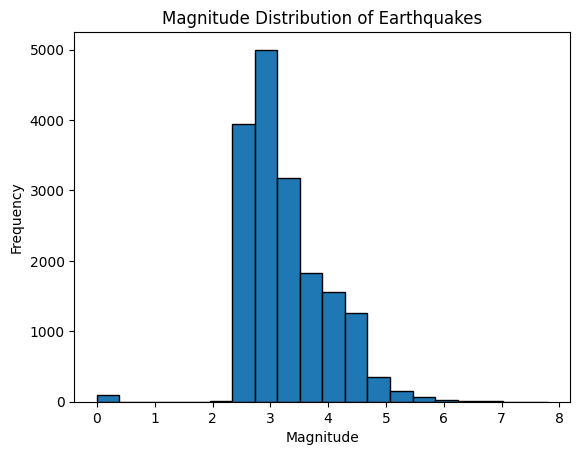

In [6]:
plt.hist(df["Magnitude"], bins=20, edgecolor='black')
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Magnitude Distribution of Earthquakes")
plt.show()

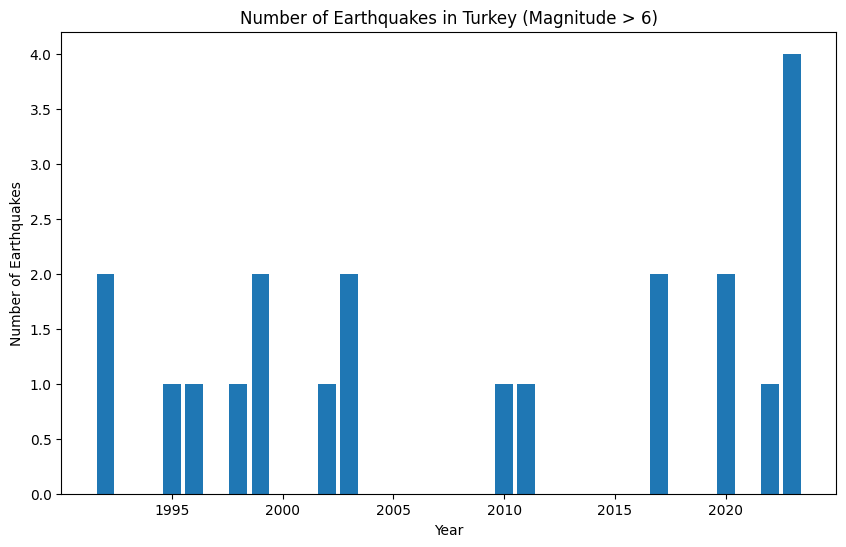

In [7]:
df['Time'] = pd.to_datetime(df['Time'])
df['Year'] = df['Time'].dt.year

df = df[df['Magnitude'] > 6]

counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes in Turkey (Magnitude > 6)')
plt.show()

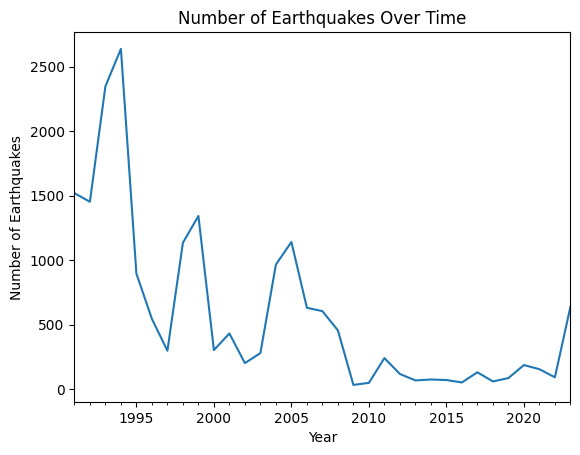

In [8]:
df = pd.read_csv("earthquakes.csv")
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

yearly_counts = df.resample('Y').size()

yearly_counts.plot()

plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Number of Earthquakes Over Time")


plt.show()


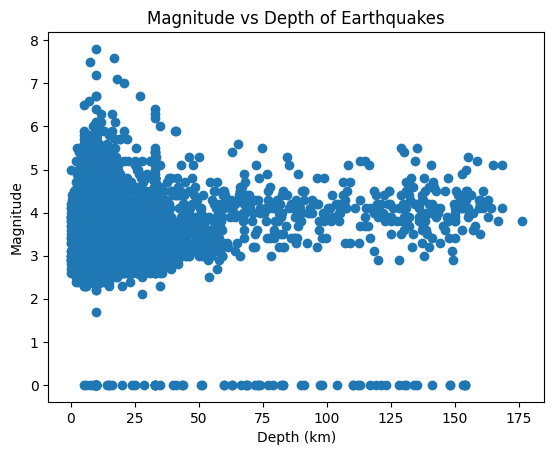

In [9]:
plt.scatter(df["Depth"], df["Magnitude"])

plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.title("Magnitude vs Depth of Earthquakes")

plt.show()

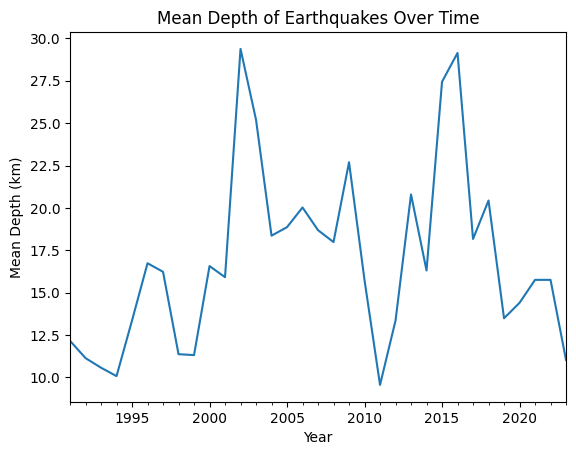

In [10]:
df = pd.read_csv("earthquakes.csv")
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
yearly_mean_depth = df['Depth'].resample('Y').mean()

yearly_mean_depth.plot()

plt.xlabel("Year")
plt.ylabel("Mean Depth (km)")
plt.title("Mean Depth of Earthquakes Over Time")

plt.show()


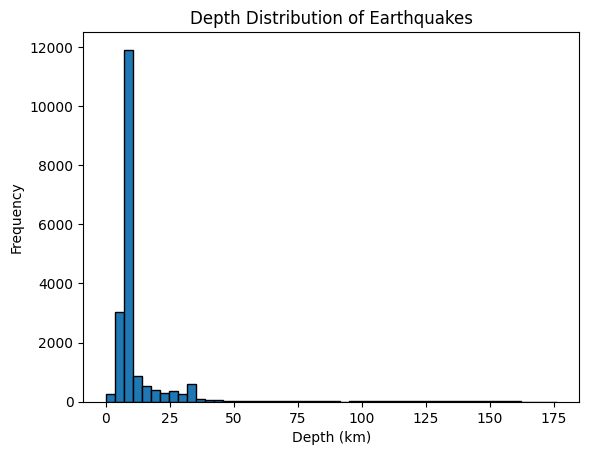

In [11]:
plt.hist(df["Depth"], bins=50, edgecolor='black')

plt.xlabel("Depth (km)")
plt.ylabel("Frequency")
plt.title("Depth Distribution of Earthquakes")

plt.show()

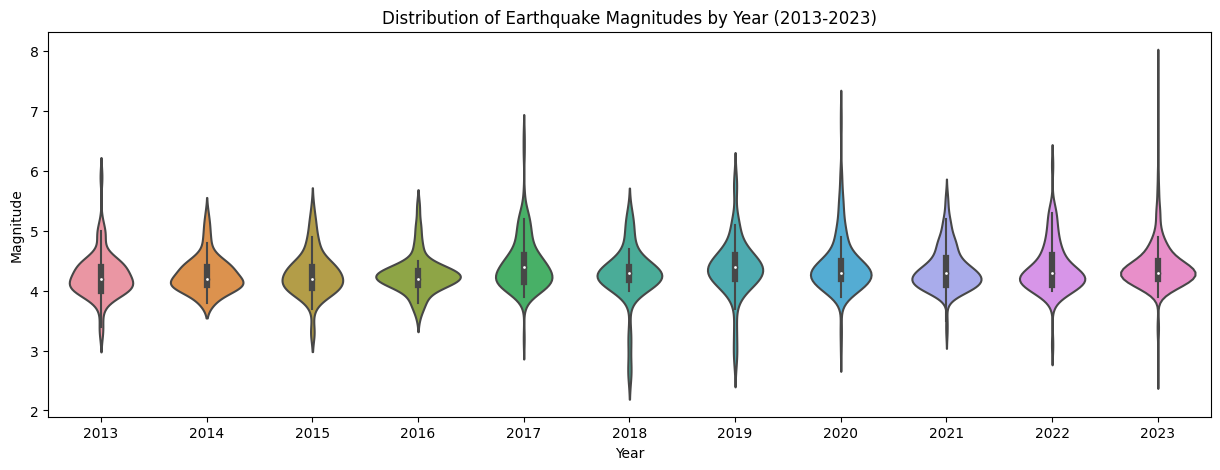

In [12]:
import seaborn as sns

df = pd.read_csv("earthquakes.csv")
df['Time'] = pd.to_datetime(df['Time'])
df['Year'] = df['Time'].dt.year

df = df[(df['Year'] >= 2013) & (df['Year'] <= 2023)]

plt.figure(figsize=(15, 5))
sns.violinplot(x="Year", y="Magnitude", data=df)

plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.title("Distribution of Earthquake Magnitudes by Year (2013-2023)")

plt.show()


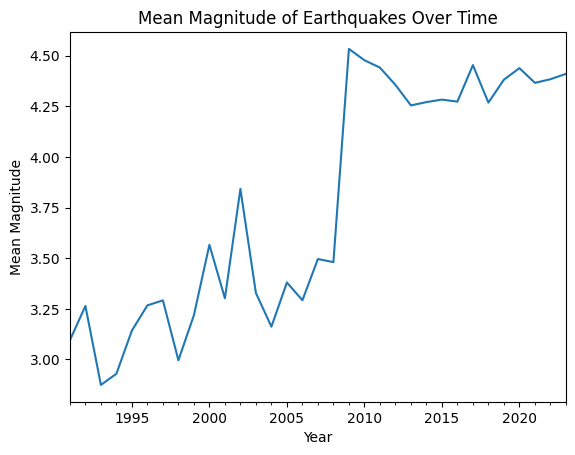

In [13]:
df = pd.read_csv("earthquakes.csv")
df['Time'] = pd.to_datetime(df['Time'])

df.set_index('Time', inplace=True)


yearly_mean_magnitude = df['Magnitude'].resample('Y').mean()

yearly_mean_magnitude.plot()


plt.xlabel("Year")
plt.ylabel("Mean Magnitude")
plt.title("Mean Magnitude of Earthquakes Over Time")


plt.show()


<ipython-input-14-cdd75107c1c4>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


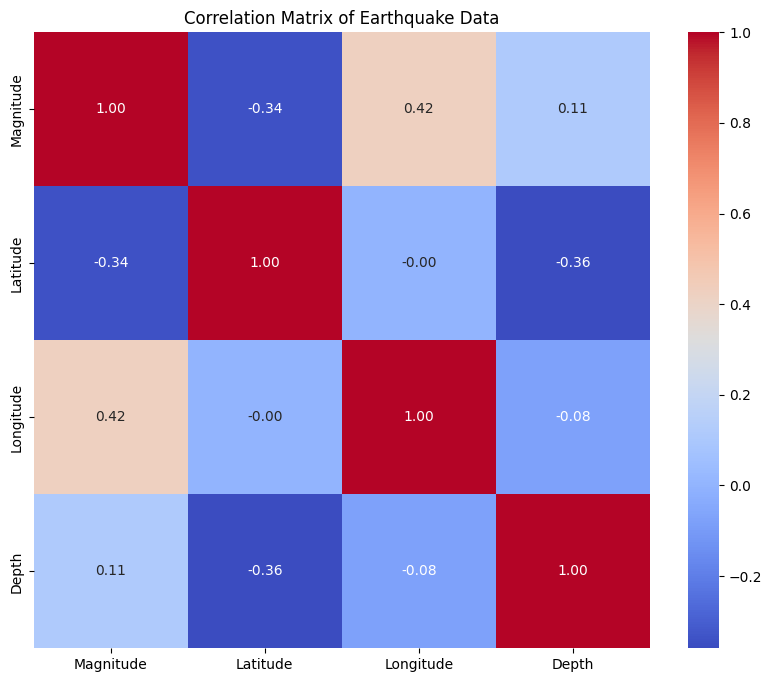

In [14]:
df = pd.read_csv("earthquakes.csv")

#df = df[["Magnitude", "Depth"]]

corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title("Correlation Matrix of Earthquake Data")

plt.show()